# Clustering - K Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\MLIoT\ML\dataset\Wholesale customers data.csv")
df.shape

(440, 8)

# Data Exploration

In [4]:
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# Clustering

In [8]:
df2 = df[['Fresh','Milk']]
df2.shape

(440, 2)

In [9]:
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=3,random_state=5)
model.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [11]:
model.cluster_centers_

array([[ 4992.68817204,  6019.75268817],
       [44622.5625    , 12838.09375   ],
       [19063.94573643,  3566.10077519]])

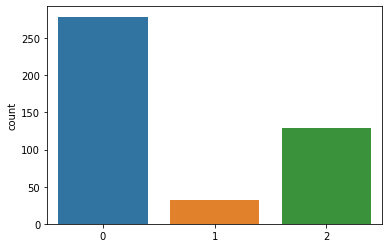

In [12]:
#check for cluster size
sns.countplot(model.labels_)
plt.show()

In [13]:
# for 4 features
df3 = df[['Fresh','Milk','Grocery','Frozen']]

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3 = sc.fit_transform(df3)

In [16]:
model2 = KMeans(n_clusters=3,random_state=5)
model2.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [17]:
model2.cluster_centers_

array([[-0.23783822, -0.24037031, -0.23932744, -0.2021462 ],
       [-0.28051843,  1.92743279,  2.18506114, -0.18642898],
       [ 1.77210038, -0.04452883, -0.26515809,  1.46300038]])

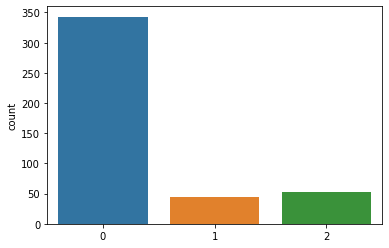

In [18]:
sns.countplot(model2.labels_)
plt.show()

# Elbow Method

In [40]:
k = []
inertia = []

for i in range(1,20):
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(df2)
    inertia.append(model.inertia_)
    k.append(i)

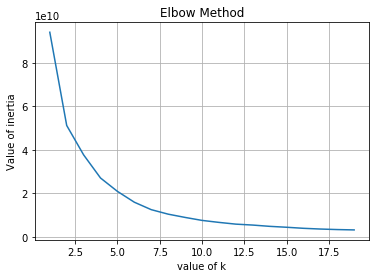

In [41]:
plt.plot(k,inertia)
plt.grid("on")
plt.xlabel("value of k")
plt.ylabel("Value of inertia")
plt.title("Elbow Method")
plt.show()